## Assignment 1.1 (Part 2)

# Exercises: BA edition
First a couple of questions to make sure that you've actually read the text.

- **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**

Note:

- $k_{max} = k_{min}N^{\frac{1}{\gamma-1}}$ ($2.1$) **[1]**

- $\langle d \rangle\sim\begin{cases}
\text{const.} & \gamma=2\\
\ln\ln N & 2<\gamma<3\\
\frac{\ln N}{\ln\ln N} & \gamma=3\\
\ln N & \gamma>3\\
\end{cases}$ ($2.2$) **[2]**

- $\langle k^{n} \rangle=\sum_{k_{min}}^{\infty}{k^{n}p_{k}}\approx C\frac{k_{max}^{n-\gamma+1}-k_{min}^{n-\gamma+1}}{n-\gamma+1}$ ($2.3$) **[3]**

1. Anomalous Regime ($\gamma \leq 2$):

    There are two possible cases for this regime, namely the case for $\gamma<2$ and $\gamma=2$. For $\gamma<2$, the exponent $\frac{1}{\gamma-1}$ in ($2.1$) is larger than $1$. This predicts that a node exists with a degree of $k_{max} > N$ and it will run out of nodes to connect to. This shows that a large scale-free network with $\gamma<2$ can't exist unless the network allows multi-link. The average degree $\langle k\rangle$ diverges in the $N \to\infty$ limit.

    The other case for $\gamma=2$, the exponent is equal to 1, meaning that the maximum degree is linearly proportional to the network size, i.e. $k_{max}\sim N$. Similar to hub and spoke configuration, the node with a degree of $k_{max}$ will act as a central hub because it connects to all other nodes in the network. The average path length $\langle d\rangle$ is a constant and doesn't depend on $N$.

1. Scale-Free Regime ($2<\gamma>3$):
    
    With $1<\gamma-1<2$, there are two possible cases for the exponent $n-\gamma+1$ in ($2.2$). For $n=1$, the exponent $n-\gamma+1$ is less than zero, meaning that the first moment of the degree distribution is finite. While for $n\geq2$, the exponent $n-\gamma+1$ is less than zero, causing the second and higher moments diverge as $N \to\infty$. Since the exponent in ($2.1$) is smaller than $1$, the market share of the largest hub, $\frac{k_{max}}{N}$ decreases as N increases, i.e. $\frac{k_{max}}{N}\sim N^{-\frac{\gamma-2}{\gamma-1}}$.

    Equation ($2.2$) shows that the average path length $\langle d\rangle$ in this regime is $\ln\ln N$ which grows significantly slower than both $\ln N$ and $\frac{\ln N}{\ln\ln N}$. Meaning that scale-free networks in this regime are "ultra-small", as the increase in network size radically reduces path.

1. Random Network Regime $(\gamma>3)$:

    With $\gamma-1>2$, the first ($n=1$) and second ($n=2$) moment of the degree distribution are finite as the exponent $n-\gamma+1$ in ($2.2$) is less than $1$ for both $n=1, 2$. Consequently, the third and higher degree diverge as $N \to\infty$. Scale-free networks in this regime are "small" and the average path length $\langle d\rangle$ follows the small world result from random networks.
    
    The properties of scale-free networks in this regime are difficult to distinguish from properties of a random network of a similar size. As $\gamma$ increases, it will be harder to differentiate from a random network. This is due to the limited size of the available networks with large degree exponent, making it difficult to obtain convincing evidence of their scale-free nature.

### Reference

[1] Barabási, A.-L. (n.d.). *Hubs*. In **Network Science** (Chapter 4.3). Retrieved from http://networksciencebook.com/chapter/4

[2] Barabási, A.-L. (n.d.). *Ultra-Small Property*. In **Network Science** (Chapter 4.6). Retrieved from http://networksciencebook.com/chapter/4

[3] Barabási, A.-L. (n.d.). *The Meaning of Scale-Free*. In **Network Science** (Chapter 4.4). Retrieved from http://networksciencebook.com/chapter/4

- **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

Note:
- $p_{k}\sim\begin{cases}
\exp(\frac{-2\mu (\alpha)}{\langle k\rangle(1-\alpha)}k^{1-\alpha}) & 0<\alpha<1 & \text{streteched exponential distribution}\\
k^{-\gamma} & \alpha=1 & \text{power law distribution}\\
\end{cases}$ ($2.4$) **[1]**

- $k_{max}\sim\begin{cases}
(\ln t)^{\frac{1}{1-\alpha}} & 0<\alpha<1\\
t^{\frac{1}{\gamma-1}} & \alpha=1\\
t & \alpha>1\\
\end{cases}$ ($2.5$) **[1]**


1. Sublinear regime ($0<\alpha<1$)

    For $0<\alpha<1$, the bias towards higher degree nodes exists but not strong enough to create a scale-free degree distribution. The degrees follow stretched exponential distribution in ($2.4$), where $\mu(\alpha)$ depends weakly on $\alpha$.

    The maximum degree, $k_{max}$, growth is logarithmic as shown in ($2.5$) causing fewer and smaller hubs compared to scale-free network. Networks in this regime resemble random networks as $\alpha\to0$ and gradually approach scale-free network as $\alpha\to1$

1. Linear regime ($\gamma=1$)
    
    This is the standard Barabási-Albert model where the degree distribution follows a power law distribution in ($2.4$). The maximum degree, $k_{max}$, grows polynomially with time as shown in ($2.5$). Networks in this regime are  scale-free networks if their degree distribution is a power law distribution which depends on $\gamma$.

1. Superlinear regime ($\gamma>1$)

    For $\gamma>1$, the bias to higher degree nodes is enhanced, meaning that the early nodes will become super hubs as newer nodes has a high chance of linking to them. The maximum degree, $k_{max}$, grows linearly with time as shown in ($2.5$). This winner takes all dynamic leads to a hub and spoke configuration.

### Reference

[1] Barabási, A.-L. (n.d.). *Non-linear Preferential Attachment*. In **Network Science** (Chapter 5.8). Retrieved from http://networksciencebook.com/chapter/5

In [74]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

**We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:**

- **First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).**

In [75]:
# Create a simple graph consisting of 1 single edge (0, 1)
BA = nx.Graph([(0, 1)])
print("edges: ", BA.edges)

edges:  [(0, 1)]


- **Now add another node, connecting one of the existing nodes in proportion to their degree.**

In [76]:
# Choose either node 0 or node 1 randomly since both of them has the same degree
random_node = random.choice(list(BA.nodes))

# Add the edge into the network
BA.add_edge(2, random_node)
print("edges: ", BA.edges)

edges:  [(0, 1), (1, 2)]


- **Keep going until you have a 100 node network.**
    - **Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.**

In [77]:
n = 100
# Add node 3 to n into the network (0, 1, 2 are already in the network)
for node in range(3, n):

    # Flatten the current edges list, which is a [List[List[int, int]]],
    # to represent the degree-based pool
    node_pool = np.array(BA.edges).flatten()

    # Randomly pick a node from the node_pool
    random_node = random.choice(node_pool)
    
    # Add the edge into the network
    BA.add_edge(node, random_node)
print("number of nodes: ", len(BA.nodes))
print("number of edges: ", len(BA.edges))

number of nodes:  100
number of edges:  99


- **Plot the network.**

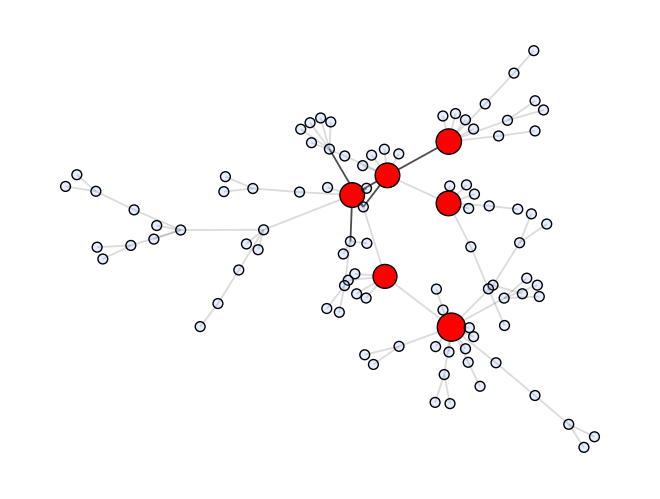

In [78]:
# Get a dictionary for node-degree pair and get max degree
degrees = dict(BA.degree())
degrees_values = list(degrees.values())
max_degree = max(degrees_values)

# Calculate mean and standard deviation for minimum degree to be a hub
mean_degrees = np.mean(degrees_values)
std_degrees = np.std(degrees_values)
hub_degree_criteria = mean_degrees + 2 * std_degrees

# Create list of colors based on the hub degree criteria
hub_color, hub_alpha = 'red', 1
default_color, default_alpha = '#7FA8FF', 0.2
node_colors = []
alphas = []

# Create a list of node sizes based on its hub degree with proper scaling
min_size = 50
scaling_factor = 100
node_sizes = []

node_sizes = []
for node in BA.nodes():
    degree = degrees[node]
    if degree >= hub_degree_criteria:
        size = min_size + (degree ** 0.5) * scaling_factor
        node_colors.append(hub_color)
        alphas.append(hub_alpha)
        node_sizes.append(size)
    else:
        node_colors.append(default_color)
        alphas.append(default_alpha)
        node_sizes.append(min_size)

# Plot
nx.draw_spring(BA, node_size=node_sizes, with_labels=False, node_color=node_colors, node_shape='o', edge_color='.3', width=1.3, edgecolors='black', alpha=alphas)

**Figure 1.2.1**

The figure shows the plot of a scale-free network using the Barabasi-Albert model with $n=100$ and $m=1$. The red nodes represent the hubs, whose degree is larger than or equal to the mean degree plus two standard deviation ($\mu + 2\sigma$).

- Add more nodes until you have a 5000 node network.

In [79]:
# Do the same process as before but with a different n
n = 5000

# Add node 100 to n into the network (0 to 99 are already in the network)
for node in range(100, n):
    node_pool = np.array(BA.edges).flatten()
    random_node = random.choice(node_pool)
    BA.add_edge(node, random_node)
print("number of nodes: ", len(BA.nodes))
print("number of edges: ", len(BA.edges))


number of nodes:  5000
number of edges:  4999


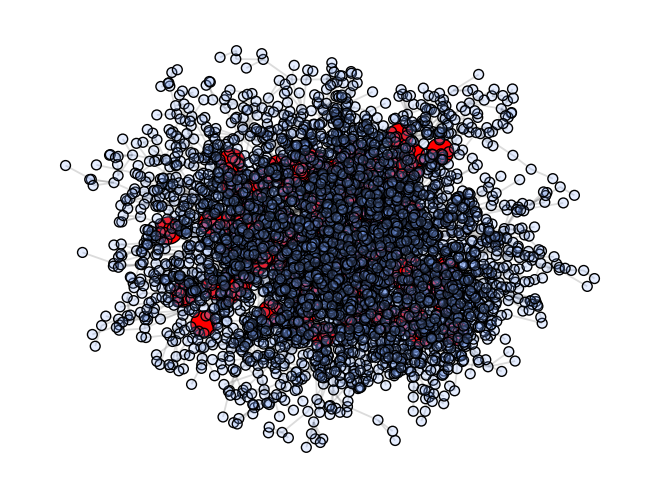

In [80]:
# Repeat the same plotting procedure as before
degrees = dict(BA.degree())
degrees_values = list(degrees.values())
max_degree = max(degrees_values)

mean_degrees = np.mean(degrees_values)
std_degrees = np.std(degrees_values)
hub_degree_criteria = mean_degrees + 2 * std_degrees

hub_color, hub_alpha = 'red', 1
default_color, default_alpha = '#7FA8FF', 0.2
node_colors = []
alphas = []

min_size = 50
scaling_factor = 100
node_sizes = []

node_sizes = []
for node in BA.nodes():
    degree = degrees[node]
    if degree >= hub_degree_criteria:
        size = min_size + (degree ** 0.5) * scaling_factor
        node_colors.append(hub_color)
        alphas.append(hub_alpha)
        node_sizes.append(size)
    else:
        node_colors.append(default_color)
        alphas.append(default_alpha)
        node_sizes.append(min_size)

nx.draw_spring(BA, node_size=node_sizes, with_labels=False, node_color=node_colors, node_shape='o', edge_color='.3', width=1.3, edgecolors='black', alpha=alphas)

**Figure 1.2.2**

The figure shows the plot of a scale-free network using the Barabasi-Albert model with $n=5000$ and $m=1$. The red nodes represent the hubs, whose degree is larger than or equal to the mean degree plus two standard deviation ($\mu + 2\sigma$). It is evident that hubs are generally older nodes by the fact that they are clustred in the dense center of the network, visually hidden by low degree nodes.

- **What's the maximum and minimum degree?**

In [81]:
# Get all the degree for each node
degree_list = [BA.degree[node] for node in BA.nodes]

# Store frequency of each degree:
# x = unique degree values
# y = number of nodes that have each degree
x, y = np.unique(degree_list, return_counts=True)
max_degree, min_degree = max(y), min(y)
print("maximum degree: ", max_degree)
print("minimum degree: ", min_degree)

maximum degree:  3369
minimum degree:  1


- **Now, bin the degree distribution using numpy.histogram.**

In [82]:
# Use numpy.histogram to get histogram values
hist, bins = np.histogram(degree_list, bins=120)

assert len(hist) == len(bins) - 1
# bins contains the edges of each bin, so it has one more element than hist
# Calculate the center of each bin for the x-axis values
bin_centers = (bins[:-1] + bins[1:]) / 2

- **Plot the distribution. Plot it with both linear and log-log axes.**

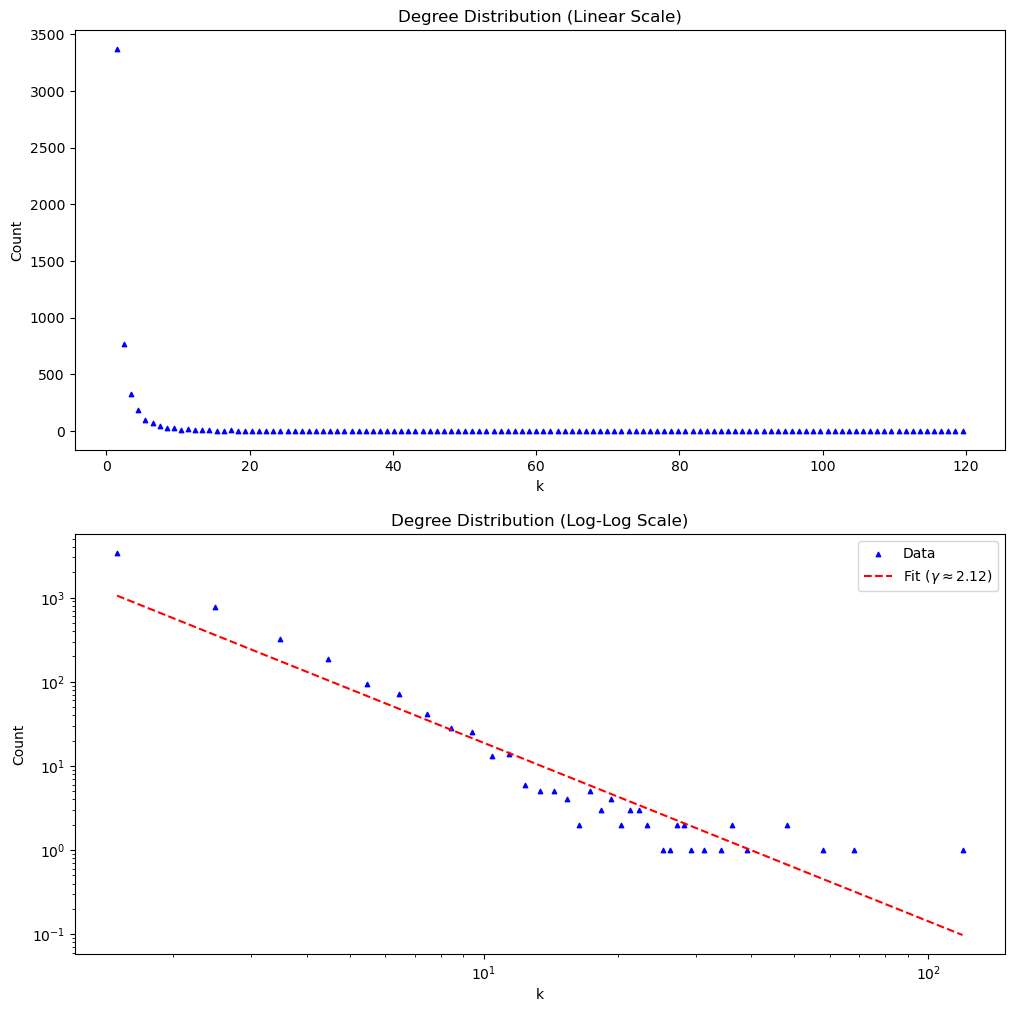

In [83]:
fig, axs = plt.subplots(2, figsize=(12,12))

# Linear axis plot
axs[0].scatter(bin_centers, hist, color='blue', s=10, marker='^')
axs[0].set_title("Degree Distribution (Linear Scale)")
axs[0].set_xlabel("k")
axs[0].set_ylabel("Count")

# Log-log axis plot
axs[1].scatter(bin_centers, hist, color='blue', s=10, marker='^', label="Data")

# Remove the points where hist (count) is zero
valid_indices = hist > 0
log_k = np.log(bin_centers[valid_indices])
log_count = np.log(hist[valid_indices])

# Calculate the linear regression with least squares fit
slope, intercept = np.polyfit(log_k, log_count, 1)
fitted_line = slope * log_k + intercept

# Plot regression line
axs[1].plot(np.exp(log_k), np.exp(fitted_line), color='red', linestyle='--', label=f'Fit ($\gamma \\approx {-slope:.2f}$)')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("Degree Distribution (Log-Log Scale)")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Count")
axs[1].legend()
plt.show()

**Figure 1.2.3**

The figure consists of two plots, showing the degree distribution of a Barabasi-Albert model with $n=5000$ and $m=1$ in linear scale (top plot) and log-log scale (bottom plot), respectively.

In the top plot, it is shown that over 75 percent of the nodes have the lowest degrees. The node count drops dramatically, making it difficult to observe the high degree node count.

In the bottom plot, the degree distribution closely follows a linear trend shown by the red dashed regression line with a negative slope ($\gamma=-m$). This indicates that the degree distribution follows a power law, confirming the scale-free nature of the network.